## Simulation

time:  10000.559392033609
NonED/call proportion :  0
COVID proportion :  0.2
Initial probabilistic data


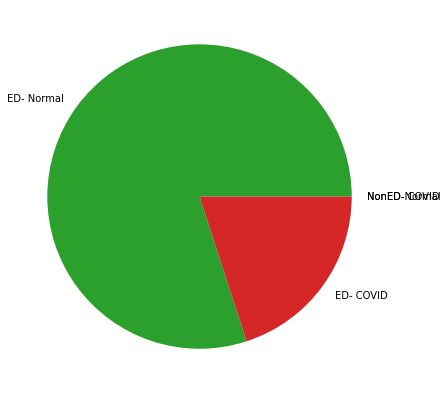

Inflow rate of patients :  2
Risk and IF:  0.2 , 1
Service rates mu_1HP, mu_1LP, mu_2, mu_3 :  1.75 , 0.05 , 0.08 , 0.032
Simulation Outcomes : 
Total patients:  20148
Avg Number of patients in HPED:  2.463
Avg Number of patients in LPED:  4.257
Avg Number of patients in Clinic:  0.02
Avg Number of patients in NClinic :  0.167
Avg Number of patients in H1:  1521.312
Avg Number of patients in H2C:  0.001
Avg Number of patients in H2N:  0.006
Avg Number of patients in H3 :  0.016
Number of patients served in total :  16051


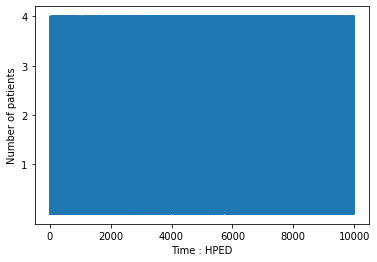

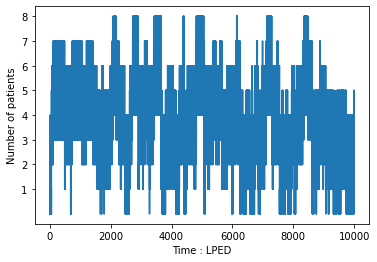

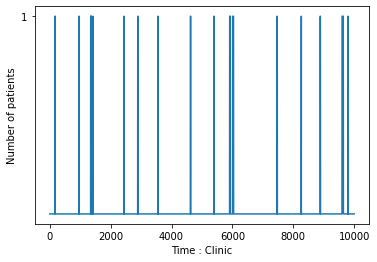

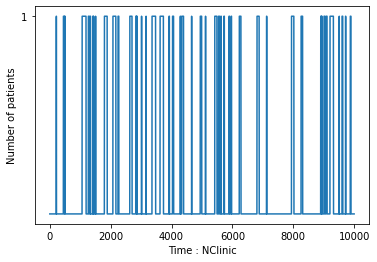

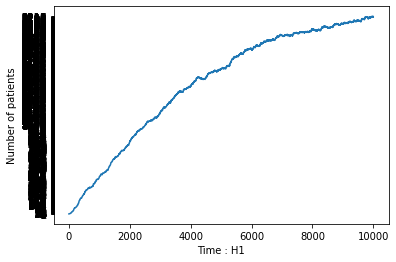

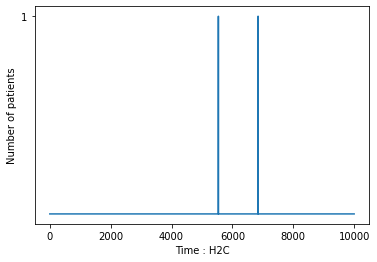

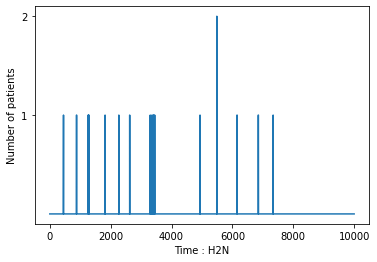

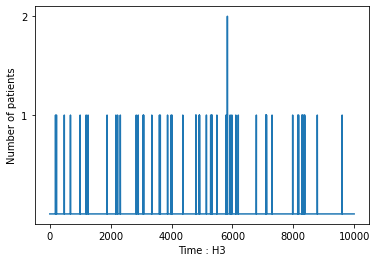

Entering Patients: In ED and NonED assigned by the hospital


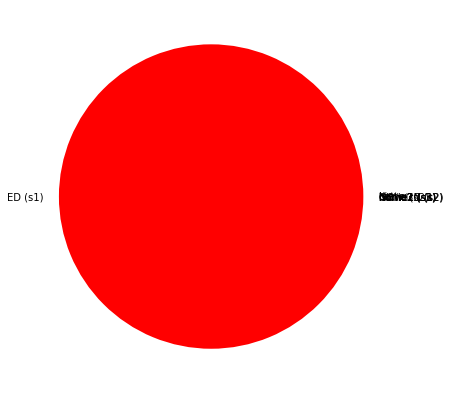

Final service received


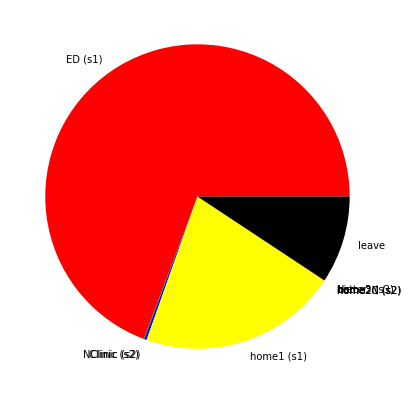

(0, 1, 0.02, 0.141)

In [ ]:
#parameters and fixed variables 
from scipy.stats import truncnorm
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics


# Input parameters for the hospital
k=1
time =10000 #total time all queues are functional
#1.8, {0.584, 0., 1.033, 0.182} {0.417, 0., 0., 0.}, {0.046, 0.067, 0.012, 0.344}

mu_1HP, mu_1LP, mu_2, mu_3 = 1.75*k, 0.05*k, 0.08*k, 0.032*k
# consider Poisson service rates of ED

e10, e12, e21, e23, e32, e34 = 0.000001*k,0.000001*k,0.000001*k,0.000001*k,0.000001*k,0.000001*k
f1back, f1leave, f2back, f2leave, f3back, f3leave = 0.0002*k,0.000125*k,0.2*k,0.125*k,0.2*k,0.125*k

lambda_1 = 2*k #rate of poisson arrivals of patients into the system

p = 0 # probability of patients entering the Non ED queue
queues = ['ED', 'NonED']  #for randomly assigning 
probqueue = [1-p, p]  #q = np.random.choice(queues, 1, p=probqueue)

pcovid = 0.2  #probability of COVID patients coming in
disease = ['covid', 'noncovid']  #for randomly assigning 
probcovid = [pcovid , 1-pcovid]  # c = np.random.choice(disease, 1, p=probcovid)

risk = 0.2 # 0.9  #risk factor at the ED
IF = 1
sc = 0.5 #scaling factor

s1, s2, s3 = 0.75, 0.5, 0.25 
severityd = [s1, s2, s3]
probseverity = [0.99, 0.005, 0.005] #shows initial data of incoming patients
Php = probseverity[0]
#plt.pie(probseverity, labels = ['C3=0.125', 'C2=0.25', 'C1=0.5'], autopct='%1.0f%%') 
#plt.show()

eps = 0.000001 #for managing zero queue lengths


#runs the system for time t, and provides the complete hospital dashboard data
Home1list, Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, servedlist, t, timelist, qdhp, qdlp, qdc, qdn, qdr1, qdr2c, qdr2n, qdr3   = HospitalSystem(time, lambda_1, mu_1HP, mu_1LP, mu_2, mu_3,  probqueue, probcovid, queues, disease)
EDlist = HPlist + LPlist

#prints all the parameters of the system
print('NonED/call proportion : ', p)
print('COVID proportion : ', pcovid)
Initialdata(p, pcovid, Patientslist)
print('Inflow rate of patients : ', lambda_1)
print('Risk and IF: ', risk, ',' , IF)
print('Service rates mu_1HP, mu_1LP, mu_2, mu_3 : ', mu_1HP, ',', mu_1LP, ',',  mu_2, ',',  mu_3)
#severitylist = severityanalysis(Patientslist)
print('Simulation Outcomes : ')

#Complete output analysis of the system
throughput(qdhp,qdlp,qdc,qdn, qdr1, qdr2c, qdr2n, qdr3, servedlist, Patientslist)
queuelength(timelist, qdhp,qdlp,qdc,qdn, qdr1, qdr2c, qdr2n, qdr3)
totalanalysis(Patientslist)
minmaxanalysis(qdc)




In [ ]:
class Patients:               
    
    # The init method or constructor  
    def __init__(self, covid, queue, wait, entrytime, severity, pid, delaytime=0, history=[]):  
      
        # Instance Variable      
        self.covid = covid   #covid and noncovid
        self.queue = queue  #ED and NonED
        self.wait = wait   #random waiting time rates (from uniform distribution)
        self.entrytime= entrytime    # the time this patient enters
        self.severity = severity   #random severity from truncated normal distribution with avg, std
        self.pid= pid   #patient's unique ID to track the service received
        self.delaytime = delaytime    #Allotted waiting time
        self.history = history  #Queues and updates 

### Delay updates

In [ ]:
#Hospital's decision function


def HD( self,  entrytime):   #division of patients by hospital  depending on severity
    if self.queue == 'NonED':   #updates the queue only for Non-ED patients
   #     Thresh1=0.01
        if self.severity ==s3:
            self.queue = 'home3'
            self.history.append(('home3', self.entrytime))  #creating first history of patients coming to NonED
        if self.severity==s2 :
            if self.covid == 'covid':
                self.queue = 'clinic'
                self.history.append(('clinic', self.entrytime))
            else:
                self.queue = 'Negclinic'
                self.history.append(('Negclinic', self.entrytime))
        if self.severity ==s1:
            self.queue = 'ED'
            self.history.append(('ED', self.entrytime))
    return self


def delayupdate(self, d):   #updating the delay time as given by the hospital
    self.delaytime = d
    return self

In [ ]:
# Function which decides the wait time for patients depending on their queue type and severity
# capturing the time service is done.
def delay(self, HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3):
    if self.queue == 'ED' :
        if self.severity ==s1:
            return 1/(mu_1HP+mu_1LP)*(len(HPQ))
        else:  #Php = probability of High priority patients coming in ED
            if mu_1LP==0:
              return 10000
            else:
              return 1/(mu_1LP+mu_1HP)*((len(HPQ)) + len(LPQ))/(1- 1/lambda_1*Php) #mu_1LP*(len(LPQ)+len(HPQ)+1)
    if self.queue== 'clinic':            
        return 1/mu_2*(len(ClinicQ))
    if self.queue == 'Negclinic':
        return 1/mu_3*(len(NegQ))
    if self.queue == 'home3':
        return 0

In [ ]:
# Function for utilities 


def EDutility(self):
   # U = min(self.severity + (self.wait +risk)*dt , 1 )
    U = 1/ (sc*(self.severity  + risk) )
    if U < self.delaytime:

        return False 
    else:

        return True 

def ClinicUtility(self):
    U = 1/(sc*(self.severity )*IF )
    if U < self.delaytime:      
        return False
    else:    
        return True
        


### Decisions

In [ ]:
# Patients' decision function 
def PD(self, entrytime, HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3):    #for patients' decision about changing queues 
    if self.queue == 'ED':   #includes patients directly coming to ED and Non ED
        dt = delay(self,  HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)
        self.delaytime = dt
        if EDutility(self) == False :   # Patients who dont want the ED 
            if len(self.history)==0:  # Patients entering NonED first time from ED
                self.history.append(('ED', self.entrytime))  #first history of ED
                self.queue= 'NonED'
                self = HD(self,  entrytime) #updating queue and delaytime after joining NonED 
                d = delay(self,  HPQ, LPQ, ClinicQ, NegQ,  mu_1HP, mu_1LP, mu_2, mu_3)
                self = delayupdate(self, d)
                dt = self.delaytime
                # second history is updated with the function 
            if self.queue == 'ED':
                self.queue = 'home1'
                self.history.append(('home1', self.entrytime))
            else:
                if ClinicUtility(self) == False : # leave if clinic isn't good too
                  
                  if self.covid == 'covid': 
                    self.queue = 'home2C'
                    self.history.append(('home2C', self.entrytime))  #third history if they leave
                  else: 
                    self.queue = 'home2N'
                    self.history.append(('home2N', self.entrytime))
                else:
                    if self.queue == 'home3' :  #assigned home by the hospital :
                        self.queue = 'home3'
                        self.history.append((self.queue, self.entrytime))  #third history if they leave
                    else:  #assigned clinic by the hospital
                        if self.covid == 'covid':  #just restating the queues
                            self.queue = 'clinic'
                        else:
                            self.queue = 'Negclinic'
            
        else:  #people who want to stay in ED 
             if len(self.history)==0: # First history for people who stay in ED
                 self.queue = 'ED'
                 self.history.append(('ED', self.entrytime))  
          
    else:  #Patients who came to NonED first and got assigned at the clinic/home
        dt = delay(self,  HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)#first history is added already
        
        self.delaytime = dt
        if self.queue =='home3'  : # Patients in the home queue
            self.queue = 'ED' 
            d = delay(self,  HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)
            self = delayupdate(self, d)  #check with the ED times
            dt = self.delaytime 
            if EDutility(self) == False:  #ED too risky, leave ED
                self.queue = 'home3'
                self.delaytime = 0 # don't update the history again
            else:
                self.history.append(('ED', self.entrytime))  #second history for ED for people who want ED
                self.queue = 'ED'
        else:  #patients in the clinic queue. History is already added
            
            if ClinicUtility(self) == False : # Not satisfied with the clinic
                self.queue = 'ED'
                d = delay(self,  HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)
                self= delayupdate(self, d)  #check with the ED times
                dt= self.delaytime 
                self.history.append(('ED', self.entrytime))  #second history for ED
                if EDutility(self) == False :  #ED too risky, leave
                  
                  if self.covid == 'covid':
                    self.queue = 'home2C' #not satisfied with the ED as well
                    self.history.append((self.queue, self.entrytime))  #third history if they leave
                  else: 
                    self.queue = 'home2N' #not satisfied with the ED as well
                    self.history.append((self.queue, self.entrytime))
            #else: stay in the clinic or Negclinic
    

In [ ]:
#Addition of patients to their queues
def queueaddition(self, HPQ, LPQ, ClinicQ, NegQ, Home1list, Home2Clist, Home2Nlist, Home3list , HPlist, LPlist, Cliniclist, Neglist):
    q = self.queue 
    if q == 'home1':
        Home1list.append(self)
    if q == 'home2C':
        Home2Clist.append(self)
        
    if q == 'home2N':
        Home2Nlist.append(self)
        
    if q == 'home3' :
        Home3list.append(self)
    if q == 'Negclinic':
        NegQ.append(self)
        Neglist.append(self)
    if q == 'clinic' :
        ClinicQ.append(self)
        Cliniclist.append(self)
    if q == 'ED':
        if self.severity ==s1 :
            HPQ.append(self)
            HPlist.append(self)
        else:
            LPQ.append(self)
            LPlist.append(self)

### Service functions

In [ ]:
#function for patients exiting their queues after receiving services 
def constantservice(mu, timegap, previoustime, queuelist, t):
     newlist1 = np.repeat(mu, 50) #updated everytime, with previoustime as the first timestep
     if previoustime != 0:
         newlist1 = np.insert(newlist1, 0, previoustime, axis=0)
     serviced  = []
     sum = 0
     while sum + newlist1[0] < timegap :                                                                                                                                                                                                                                                                                                             
         if len(queuelist) == 0:  #break if empty 
             break
         else:
             pp = newlist1[0]  #time taken for service
             newlist1 = np.delete(newlist1, 0)            
             patient = queuelist.pop(0)  #removing patient from he current queue
             patient.queue = 'serviced'  #adding to the serviced queue
             serviced.append(patient)  #number of people treated in this iteration
             sum = sum + pp  #total time spent so far             
             patient.history.append((patient.queue, t+sum))  #update service history
             #We are capturing the time after service is done. The initial part of service time is lost 
             #  if the loop changes. 
     if len(queuelist) == 0:
         previoustime = 0  #no carry forward if the queue is empty
     else:
         previoustime = sum + newlist1[0] - timegap    #use this in the next loop
     return serviced, previoustime, queuelist  #serviced is the list of patients serviced.

 #let 20 be the limit of people getting out in one go
def poissonservice(mu, timegap, previoustime, queuelist, t):
     newlist1 = np.random.exponential(1/mu,50)  #updated everytime, with previoustime as the first timestep
     if previoustime != 0:
        newlist1= np.insert(newlist1, 0, previoustime, axis=0)
     serviced  = []
     sum = 0
     while sum + newlist1[0] < timegap :
         if len(queuelist) == 0:  #break if empty 
             break
         else:
             pop = newlist1[0]  #time taken for service
             newlist1 = np.delete(newlist1, 0)            
             patient = queuelist.pop(0)  #removing patient from the current queue
             patient.queue = 'serviced'  #adding to the serviced queue
             serviced.append(patient)  #number of people treated in this iteration
             sum = sum + pop  #total time spent so far
             patient.history.append((patient.queue, t+sum))  #update service history
             #print(patient.history)
             #print(round(t+sum -patient.history[0]1, 2), round(patient.delaytime, 2 ), patient.history[-2][0] )
             #We are capturing the time after service is done. The initial part of service time is lost 
             #  if the loop changes. 
     if len(queuelist) == 0:
         previoustime = 0  #no carry forward if the queue is empty
     else:
         previoustime = sum +  newlist1[0] - timegap    #use this in the next loop
     return serviced, previoustime, queuelist  #serviced is the list of patients serviced. 
      

In [ ]:
# depending on what the next timestamp is, we implement the action accordingly

def Action(t, timegap, min_index,pid, HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died):
  if timegap ==0 or min_index==0:
    pid = pid+1
    w = 0 
    s = np.random.choice(severityd, 1, p=probseverity)
    #self, covid, queue, wait, entrytime, severity, pid, delaytime=0, history
    history=[]
    c = np.random.choice(disease, 1, p=probcovid)
    q = np.random.choice(queues, 1, p=probqueue)
    P = Patients( c, q, w, t, s, pid, delaytime=0, history=[])

    P = HD(P,  t)  #Hospital's decision, effective if NonED
    PD(P, t, HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)
    Patientslist.append(P)
    queueaddition( P,  HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died
  if min_index == 1:
    if len(ClinicQ)>0:
      randompick  = np.random.choice(len(ClinicQ))
      Prp = ClinicQ[randompick]
      Prp.severity = s1
      Prp.queue = 'ED'
      PD(Prp, t, HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)
      queueaddition( Prp,  HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died
  if min_index == 2:
    if len(NegQ)>0:
      randompick  = np.random.choice(len(NegQ))
      Prp = NegQ[randompick]
      Prp.severity = s1
      Prp.queue = 'ED'
      PD(Prp, t, HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)
      queueaddition( Prp,  HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died
  if min_index == 3:
    if len(Home1list)>0:
      randompick  = np.random.choice(len(Home1list))
      Prp = Home1list[randompick]
      del Home1list[randompick]
      Prp.severity = 1
      Prp.queue = 'die'
      died.append(Prp)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died
  if min_index == 4:
    if len(Home1list)>0:
      randompick  = np.random.choice(len(Home1list))
      Prp = Home1list[randompick]
      del Home1list[randompick]
      Prp.severity = s2
      if Prp.covid =='covid':
          Prp.queue = 'home2C'
          Prp.history.append(('home2C', t))
      else:
          Prp.queue = 'home2N'
          Prp.history.append(('home2N', t))
      
      queueaddition(Prp, HPQ, LPQ, ClinicQ, NegQ, Home1list, Home2Clist, Home2Nlist, Home3list , HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died
  
  if min_index ==5:
    if len(Home1list)>0:
      randompick  = np.random.choice(len(Home1list))
      Prp = Home1list[randompick]
      del Home1list[randompick]
      if Prp.severity==1 or Prp.severity==0:
        Prp.severity= s1
      Prp.queue =  np.random.choice(queues, 1, p=probqueue)
      Prp = HD(Prp,  t)  #Hospital's decision, effective if NonED
      PD(Prp, t, HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)
      queueaddition( Prp,  HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died

  if min_index==6:
    if len(Home1list)>0:
      randompick  = np.random.choice(len(Home1list))
      Prp = Home1list[randompick]
      del Home1list[randompick]
      Prp.history.append(('leave', t))
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died

  if min_index == 7:
    if len(Home2Clist)>0:
      randompick  = np.random.choice(len(Home2Clist))
      Prp = Home2Clist[randompick]
      del Home2Clist[randompick]
      Prp.severity = s1
      Prp.queue = 'home1'
      Prp.history.append(('home1', t))
      queueaddition(Prp, HPQ, LPQ, ClinicQ, NegQ, Home1list, Home2Clist, Home2Nlist, Home3list , HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died
 
  if min_index == 8:
    if len(Home2Clist)>0:
      randompick  = np.random.choice(len(Home2Clist))
      Prp = Home2Clist[randompick]
      del Home2Clist[randompick]
      Prp.severity = s3
      Prp.queue = 'home3'
      Prp.history.append(('home3', t))
      queueaddition(Prp, HPQ, LPQ, ClinicQ, NegQ, Home1list, Home2Clist, Home2Nlist, Home3list , HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died

  if min_index ==9:
    if len(Home2Clist)>0:
      randompick  = np.random.choice(len(Home2Clist))
      Prp = Home2Clist[randompick]
      del Home2Clist[randompick]
      if Prp.severity==1 or Prp.severity==0:
        Prp.severity= s2
      Prp.queue =  np.random.choice(queues, 1, p=probqueue)
      Prp = HD(Prp,  t)  #Hospital's decision, effective if NonED      
      PD(Prp, t, HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)
      queueaddition( Prp,  HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died

  if min_index==10:
    if len(Home2Clist)>0:
      randompick  = np.random.choice(len(Home2Clist))
      Prp = Home2Clist.pop(randompick)
      Prp.history.append(('leave', t))
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died

  if min_index == 11:
    if len(Home2Nlist)>0:
      randompick  = np.random.choice(len(Home2Nlist))
      Prp = Home2Nlist.pop(randompick)
      Prp.severity = s1
      Prp.queue = 'home1'
      Prp.history.append(('home1', t))
      queueaddition(Prp, HPQ, LPQ, ClinicQ, NegQ, Home1list, Home2Clist, Home2Nlist, Home3list , HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died
 
  if min_index == 12:
    if len(Home2Nlist)>0:
      randompick  = np.random.choice(len(Home2Nlist))
      Prp = Home2Nlist.pop(randompick)
      Prp.severity = s3
      Prp.queue = 'home3'
      Prp.history.append(('home3', t))
      queueaddition(Prp, HPQ, LPQ, ClinicQ, NegQ, Home1list, Home2Clist, Home2Nlist, Home3list , HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died

  if min_index ==13:
    if len(Home2Nlist)>0:
      randompick  = np.random.choice(len(Home2Nlist))
      Prp = Home2Nlist[randompick]
      del Home2Nlist[randompick]
      if Prp.severity==1 or Prp.severity==0:
        Prp.severity = s2
      Prp.queue =  np.random.choice(queues, 1, p=probqueue)
      Prp = HD(Prp,  t)  #Hospital's decision, effective if NonED
      PD(Prp, t, HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)
      queueaddition( Prp,  HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died

  if min_index==14:
    if len(Home2Nlist)>0:
      randompick  = np.random.choice(len(Home2Nlist))
      Prp = Home2Nlist.pop(randompick)
      Prp.history.append(('leave', t))
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died

  if min_index == 15:
    if len(Home3list)>0:
      randompick  = np.random.choice(len(Home3list))
      Prp = Home3list.pop(randompick)
      Prp.severity = s2
      if Prp.covid =='covid':
          Prp.queue = 'home2C'
          Prp.history.append(('home2C', t))
      else:
          Prp.queue = 'home2N'
          Prp.history.append(('home2N', t))
      queueaddition(Prp, HPQ, LPQ, ClinicQ, NegQ, Home1list, Home2Clist, Home2Nlist, Home3list , HPlist, LPlist, Cliniclist, Neglist)
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died
 
  if min_index == 16:
    if len(Home3list)>0:
      randompick  = np.random.choice(len(Home3list))
      Prp = Home3list[randompick]
      del Home3list[randompick]
      Prp.severity = 0
      Prp.queue = 'better'
      Prp.history.append(('better', t))
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died
 
  if min_index ==17:
    if len(Home3list)>0:
      randompick  = np.random.choice(len(Home3list))
      Prp = Home3list[randompick]
      del Home3list[randompick]
      if Prp.severity ==0 or Prp.severity ==1:
        Prp.severity = s3
      Prp.queue =  np.random.choice(queues, 1, p=probqueue)
      Prp = HD(Prp,  t)  #Hospital's decision, effective if NonED
      PD(Prp, t, HPQ, LPQ, ClinicQ, NegQ, mu_1HP, mu_1LP, mu_2, mu_3)
      queueaddition( Prp,  HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist)  
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died

  if min_index==18:
    if len(Home3list)>0:
      randompick  = np.random.choice(len(Home3list))
      Prp = Home3list.pop(randompick)
      Prp.history.append(('leave', t))
    return HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died


### Action

In [ ]:
#All action happens here. Patients enter randomly, leave or receive service and exit.
def HospitalSystem(time, lambda_1, mu_1HP, mu_1LP, mu_2, mu_3, probqueue, probcovid, queues, disease):
    HPQ, LPQ, ClinicQ, NegQ=[], [], [], []  #creating functional queues

    HPlist, LPlist, Cliniclist, Neglist=[], [], [], [] #initiating lists where all Q information is stored
  
    Home1list, Home2Clist, Home2Nlist, Home3list =[], [], [], [] #current repositories list

    Patientslist, servedlist, died=[], [], []  #creating all lists 

    pid=0               
    timelist = []      #list of times at arrivals

    qdhp, qdlp, qdc, qdn=[], [], [], [] #queue data for all queues : length of queue at the time of arrivals
    qdr1, qdr2c, qdr2n, qdr3=[], [], [], [] #queue data for repositories

    t=0
    previoustime1, previoustime2, previoustime3 = 0 , 0 , 0
    while t > -1:
        servicedHP=[]  #to keep a track of patients getting treated in one iteration
        servicedLP =[]
        serviced2=[]
        serviced3=[]
        
        tArrival = np.random.exponential(1/lambda_1)
        tClEvolution = np.random.exponential(1/((len(ClinicQ)+eps)*e21))
        tNClEvolution = np.random.exponential(1/((len(NegQ)+eps)*e21))

        tH1up= np.random.exponential(1/((len(Home1list)+eps)*e10))
        tH1down= np.random.exponential(1/((len(Home1list)+eps)*e12))
        tH1back= np.random.exponential(1/((len(Home1list)+eps)*f1back))
        tH1leave= np.random.exponential(1/((len(Home1list)+eps)*f1leave))

        tH2Cup= np.random.exponential(1/((len(Home2Clist)+eps)*e21))
        tH2Cdown= np.random.exponential(1/((len(Home2Clist)+eps)*e23))
        tH2Cback= np.random.exponential(1/((len(Home2Clist)+eps)*f2back))
        tH2Cleave= np.random.exponential(1/((len(Home2Clist)+eps)*f2leave))

        tH2Nup= np.random.exponential(1/((len(Home2Nlist)+eps)*e21))
        tH2Ndown= np.random.exponential(1/((len(Home2Nlist)+eps)*e23))
        tH2Nback= np.random.exponential(1/((len(Home2Nlist)+eps)*f2back))
        tH2Nleave= np.random.exponential(1/((len(Home2Nlist)+eps)*f2leave))

        tH3up= np.random.exponential(1/((len(Home3list)+eps)*e10))
        tH3down= np.random.exponential(1/((len(Home3list)+eps)*e12))
        tH3back= np.random.exponential(1/((len(Home3list)+eps)*f3back))
        tH3leave = np.random.exponential(1/((len(Home3list)+eps)*f3leave))

        Tlist = [tArrival, tClEvolution, tNClEvolution, tH1up, tH1down, tH1back, tH1leave, 
                  tH2Cup, tH2Cdown, tH2Cback, tH2Cleave, tH2Nup, tH2Ndown,tH2Nback,tH2Nleave,
                  tH3up, tH3down, tH3back, tH3leave]
        timegap = min(Tlist)
        timelist.append(t)
        #timegap = lambda_list.pop(0)
        serviced2, previoustime2, ClinicQ = poissonservice(mu_2, timegap, previoustime2, ClinicQ, t)
        serviced3, previoustime3, NegQ = poissonservice(mu_3, timegap, previoustime3, NegQ, t)
        if len(HPQ) == 0:
            servicedLP, previoustime1, LPQ = poissonservice((mu_1LP+mu_1HP), timegap, previoustime1, LPQ, t)
        if len(HPQ) > 0 :
            servicedHP, previoustime1, HPQ = poissonservice((mu_1LP+mu_1HP), timegap, previoustime1, HPQ, t)
            if len(HPQ) == 0:
                servicedLP, previoustime1, LPQ = poissonservice((mu_1LP+mu_1HP), previoustime1, 0, LPQ, t)
        servedlist = servedlist + servicedHP + serviced2 + serviced3 + servicedLP    
        ql1, ql2, ql3, ql4  = len(HPQ), len(LPQ), len(ClinicQ), len(NegQ) #queue lengths
        r1, r2c, r2n, r3 = len(Home1list), len(Home2Clist), len(Home2Nlist), len(Home3list)
        qdhp.append(ql1)
        qdlp.append(ql2+ql1)
        qdc.append(ql3)
        qdn.append(ql4)

        qdr1.append(r1)
        qdr2c.append(r2c)
        qdr2n.append(r2n)
        qdr3.append(r3)
        t = timegap + t # remove patients from service queues before adding a new patient
        if t > time :
            print('time: ', t)
            break

        min_index=Tlist.index(timegap)
        
        HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died = Action(t, timegap, min_index,pid, HPQ, LPQ, ClinicQ, NegQ,Home1list,Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, died)

    return Home1list, Home2Clist, Home2Nlist, Home3list, HPlist, LPlist, Cliniclist, Neglist, Patientslist, servedlist, t, timelist, qdhp, qdlp, qdc, qdn, qdr1, qdr2c, qdr2n, qdr3

## Performance measures

In [ ]:
#performance measures 
#Creating list of indices in Pateintslist according to queues
def queuelength(timelist, qdhp,qdlp,qdc,qdn, qdr1, qdr2c, qdr2n, qdr3):
    plt.plot( timelist, qdhp , label="HPED" )
    plt.yticks(range(1,max(qdhp)+1))
    plt.ylabel("Number of patients")
    plt.xlabel("Time : HPED")
    plt.show()
    plt.plot(timelist,  qdlp, label="LPED")
    plt.yticks(range(1,max(qdlp)+1))
    plt.xlabel("Time : LPED")
    plt.ylabel("Number of patients")
    plt.show()
    plt.plot( timelist, qdc,  label="Clinic")  
    plt.yticks(range(1,max(qdc)+1))
    plt.xlabel("Time : Clinic")
    plt.ylabel("Number of patients")
    plt.show()
    plt.plot( timelist, qdn, label="NClinic" )
    plt.yticks(range(1,max(qdn)+1))
    plt.xlabel("Time : NClinic")
    plt.ylabel("Number of patients")
    plt.show()
    plt.plot( timelist, qdr1 , label="H1" )
    plt.yticks(range(1,max(qdr1)+1))
    plt.ylabel("Number of patients")
    plt.xlabel("Time : H1")
    plt.show()
    plt.plot(timelist,  qdr2c, label="H2C")
    plt.yticks(range(1,max(qdr2c)+1))
    plt.xlabel("Time : H2C")
    plt.ylabel("Number of patients")
    plt.show()
    plt.plot( timelist, qdr2n,  label="H2N")  
    plt.yticks(range(1,max(qdr2n)+1))
    plt.xlabel("Time : H2N")
    plt.ylabel("Number of patients")
    plt.show()
    plt.plot( timelist, qdr3, label="H3" )
    plt.yticks(range(1,max(qdr3)+1))
    plt.xlabel("Time : H3")
    plt.ylabel("Number of patients")
    plt.show()


def minmaxanalysis(Anylist):  #statistics of a list
    minimum = min(Anylist)
    maximum = max(Anylist)
    mean = sum(Anylist)/len(Anylist)
    stddev = statistics.stdev(Anylist)
    return round(minimum, 3) , round(maximum, 3), round(mean, 3), round(stddev, 3)

#Analysis of offered vs actual wait times of Anylist : Patientslist, leave, home, clinic, neg, ED 
def WTanalysis(Anylist):
    offeredwait=[]
    actualwait=[]
    difference=[] #offered - actual 
    pidlist=[]
    for P in Anylist:
        s = P.pid
        pidlist.append(s)
    for P in Anylist:
        o = P.delaytime
        a = P.history[-1][1] - P.history[0][1]
        offeredwait.append(o)
        actualwait.append(a)
        difference.append( o-a )
    actualwait2 = [x for _,x in sorted(zip(pidlist,actualwait))]
    offeredwait2 = [x for _,x in sorted(zip(pidlist,offeredwait))]
    pidlist.sort()
    plt.xlabel('entry times')
    plt.ylabel('Actual Wait times')
    plt.plot(pidlist, actualwait2)
    plt.show
    plt.figure()
    plt.plot(pidlist, offeredwait)
    plt.xlabel('entry times')
    plt.ylabel('Offered Wait times')
    plt.show
    #plt.plot(pidlist, difference)
  #  plt.legend(['actual times', 'offered times', 'difference'], loc='upper right')
    return offeredwait , actualwait, difference
   # return minmaxanalysis(offeredwait), minmaxanalysis(actualwait), minmaxanalysis(difference)

def throughput(qdhp,qdlp,qdc,qdn, qdr1, qdr2c, qdr2n, qdr3, servedlist, Patientslist):
    print('Total patients: ', len(Patientslist))
    '''
    n=10000
    del qdr1[:n]
    del qdr2c[:n]
    del qdr2n[:n]
    del qdr3[:n]
    del qdhp[:n]
    del qdlp[:n]
    del qdc[:n]
    del qdn[:n]
    '''

    print('Avg Number of patients in HPED: ', round(sum(qdhp)/len(qdhp), 3))
    print('Avg Number of patients in LPED: ', round(sum(qdlp)/len(qdlp), 3))
    print('Avg Number of patients in Clinic: ', round(sum(qdc)/len(qdc),3))
    print('Avg Number of patients in NClinic : ', round(sum(qdn)/len(qdn),3))
    print('Avg Number of patients in H1: ', round(sum(qdr1)/len(qdr1),3))
    print('Avg Number of patients in H2C: ', round(sum(qdr2c)/len(qdr2c),3))
    print('Avg Number of patients in H2N: ', round(sum(qdr2n)/len(qdr2n),3))
    print('Avg Number of patients in H3 : ', round(sum(qdr3)/len(qdr3),3))
    print('Number of patients served in total : ', len(servedlist))

def severityanalysis(Anylist):  #severity vs the wait times #severity in a facility
    severitylist=[]
    offeredwait, actualwait, difference = WTanalysis(Anylist)
    for P in Anylist:
        s = P.severity
        severitylist.append(s)
    plt.figure()
    plt.plot(severitylist, actualwait, 'o')
    #plt.plot(severitylist, offeredwait)
    #plt.plot(severitylist, difference)
    plt.xlabel('Severity')
    plt.legend(['actual wait times'], loc='upper right') #'offered times', 'difference'
    plt.show()

    offeredwait = [x for _,x in sorted(zip(severitylist,offeredwait))]
    actualwait = [x for _,x in sorted(zip(severitylist,actualwait))]
    difference = [x for _,x in sorted(zip(severitylist,difference))]
    severitylist.sort()
    
    plt.hist(severitylist, 3, facecolor= 'blue')
    plt.xlabel("Severity distribution of the patients served")
    plt.show()
    
    return severitylist

def switches(anylist, n):  #check the initial with n=0, last with n=-1
    first=0
    second=0
    third = 0
    fourth=0
    fifth=0
    sixth=0
    seventh=0
    eighth = 0
    ninth = 0
    tenth = 0
    label1='ED'
    label2= 'Clinic'
    label5= 'NegClinic'
    #prints a piechart of patients categorized into their initial queues and final queues  
    for p in anylist:
            h=p.history
            if h[-1][0] == 'serviced':
                del h[-1]
            if h[n][0]== 'ED':
                first = first+1
            if h[n][0]== 'clinic':
                second = second+1
            if h[n][0] == 'Negclinic':
                third= third +1
            if h[n][0] == 'home1':
                fourth = fourth+1
            if h[n][0] == 'home2C':
                fifth = fifth+1
            if h[n][0] == 'home2N':
                sixth = sixth+1
            if h[n][0] == 'home3':
                seventh = seventh+1
            if h[n][0] == 'die':
                eighth = eighth+1
            if h[n][0] == 'better':
                ninth = ninth+1
            if h[n][0]== 'leave':
                tenth = tenth+1
    
    labels = ['ED (s1)', 'Clinic (s2)', 'NClinic (s2)',  'home1 (s1)', 'home2C (s2)','home2N (s2)','home3 (s3)', 'die', 'better', 'leave']
    sizes = [first, second,  third, fourth, fifth, sixth, seventh, eighth, ninth, tenth]
    colors = ['red', 'green', 'blue', 'yellow', 'brown', 'cyan', 'orange', 'magenta', 'white', 'black']
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie(sizes, labels = labels, colors= colors) 
    plt.show()

def Initialdata(p, pcovid, Patientslist):
    l = len(Patientslist)
    sizes= [ l*p*(1-pcovid), l*(p)*pcovid, l*(1-pcovid)*(1-p), l*(1-p)*pcovid]
    labels =['NonED-Normal', 'NonED- COVID', 'ED- Normal', 'ED- COVID']
    fig = plt.figure(figsize =(10, 7)) 
    plt.pie(sizes, labels = labels) 
    print('Initial probabilistic data')
    plt.show()

def totalanalysis(anylist):
    #offeredwait, actualwait, difference = WTanalysis(anylist)
    #minimum, maximum, mean, stddev = minmaxanalysis(offeredwait)
    #print('Offered wait times analysis :', 'minimum =', minimum, 'maximum = ', maximum, 'avg=', mean, 'Std dev = ', stddev )
    #minimum, maximum, mean, stddev = minmaxanalysis(actualwait)
    #print('Actual wait times analysis :', 'minimum =', minimum, 'maximum = ', maximum, 'avg=', mean, 'Std dev = ', stddev )
   # minimum, maximum, mean, stddev = minmaxanalysis(difference)
    #print('Analysis of their difference:', 'minimum =', minimum, 'maximum = ', maximum, 'avg=', mean, 'Std dev = ', stddev )
    #severitylist = severityanalysis(anylist)
   # minimum, maximum, mean, stddev = minmaxanalysis(severitylist)
    #print('Severity analysis :', 'minimum =', minimum, 'maximum = ', maximum, 'avg=', mean, 'Std dev = ', stddev )
    print('Entering Patients: In ED and NonED assigned by the hospital')
    switches(anylist, 0)
    print('Final service received')
    switches(anylist, -1)

